In [1]:
import matplotlib.pyplot as plt
import sys
import math

sys.path.append('../../')
# from column import Column

from porousmedialab.column import Column

import numpy as np

%matplotlib inline
# %matplotlib notebook

from thawmeasurements import F3Tm, F3T_frz, T3Tm, T2T_thw, F2Tm, F2T_frz, T1T_thw, T2Tm, F1T_frz, T1Tm, C1h, T1C1h, F1C1h, T2C1h, F2C1h, T3C1h, F3C1h, C1D9, T1C1D9, T2C1D9, T3C1D9, C1D21, T1C1D21, F1C1D21, T2C1D21, F2C1D21, T3C1D21, F3C1D21, C1D33, T1C1D33, F1C1D33, T2C1D33, F2C1D33, T3C1D33, F3C1D33, Tm, T1Tm, F1Tm, T2Tm, F2Tm, T3Tm, F3Tm, zm, D_SF6w, D_SF6g, Kh, phi_m, z_phi, Vh1, SA, D_column, Vi, Ci, T1Ci, F1Ci, T2Ci, F2Ci, T3Ci, F3Ci, Ti, T1Ti, F1Ti, T2Ti, F2Ti, T3Ti, F3Ti, SF6_Hcc, T_frz, T_thw

import seaborn as sns
                                                                                                                                                                                                                    
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 32})
sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 4, 'lines.markersize':10})  
plt.rcParams['figure.figsize'] = 8, 6


In [2]:
from porousmedialab.calibrator import find_indexes_of_intersections

In [3]:
Tm = np.concatenate([0 + T1Tm, F1T_frz+F1Tm, T1T_thw+T2Tm, F2T_frz+F2Tm, T2T_thw+T3Tm, F3T_frz+F3Tm])
Ti = np.array(np.array([16, 177, 350, 514, 681, 851]))
Tm = Tm-Ti[0]
Ti = Ti-Ti[0]

In [4]:
Tm

array([  2,   4,  20,  22,  45,  47,  93,  95, 116, 118, 168, 170, 212,
       214, 308, 310, 327, 329, 350, 352, 400, 402, 459, 461, 482, 484,
       505, 507, 553, 555, 598, 600, 622, 624, 644, 646, 690, 692, 798,
       800, 819, 821, 843, 845, 896, 898])

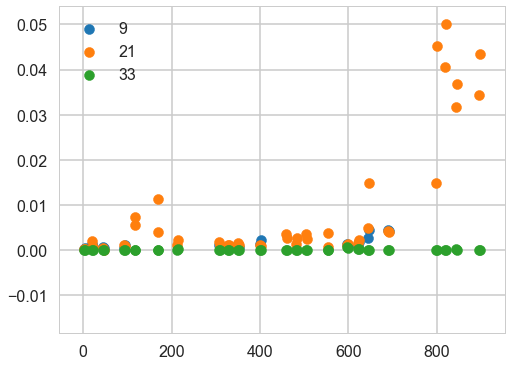

In [5]:
# len(C1D9)
plt.scatter(Tm, C1D9, label='9')
plt.scatter(Tm, C1D21,label='21')
plt.scatter(Tm, C1D33,label='33')
plt.legend()

In [6]:
tend = Tm[-1]
dt = 0.01
dx = 0.2 ## cm
L = 40 ## cm
x = np.linspace(0, L, L / dx + 1)
t = np.linspace(0, tend, round(tend / dt) + 1)
#phi = 0.8
Chs = np.zeros(t.shape) #
Fx = np.zeros(t.shape)
phi = ( 0.99 - 0.91 ) * np.exp( -x / 10 ) + 0.91

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


In [7]:
# tend = 132 ## hours
# dt = 0.01
# dx = 0.2 ## cm
# L = 40 ## cm
# x = np.linspace(0, L, L / dx + 1)
# t = np.linspace(0, tend, round(tend / dt) + 1)




In [8]:
dT = T1Tm[1::2] - T1Tm[::2]

dC1h = (T1C1h[1::2] - T1C1h[::2])

Mi = T1Ci*Vi # mass injected

#h_inj = Vi/SA/phi
h_inj = Vi/SA/0.93
h_inj

0.48678214375801243

In [9]:
ftc1 = Column(L, dx, tend, dt)

In [10]:
#Pores from the FTR experiment#

phi_w = phi*(0.875/0.97)
phi_g = 1 - phi
phi_p = phi*((0.97-0.875)/0.97) 

# conversion factor from water to gas
F_wg = phi_w/phi_g
# conversion factor from water to pore space
F_wp = phi_w/phi_p



In [11]:
ftc1.add_species(theta=(((phi_g**(10/3))/(phi**2)) / (phi_w + phi_g)), element='SF6g', D= D_SF6g, init_C=0, bc_top=0, bc_top_type='constant', bc_bot=0, bc_bot_type='constant', w = -0.00)  #-0.055
ftc1.add_species(theta=(((phi_w**(10/3))/(phi**2)) / (phi_w + phi_g )), element='SF6w', D= D_SF6w, init_C=0, bc_top=0, bc_top_type='constant', bc_bot=0, bc_bot_type='constant', w = -0.002)

# SF6mp stands for SF6 gas in micro pores, it is immobile and only collects SF6;
ftc1.add_species(theta=phi_p, element='SF6mp', D=1e-18, init_C=0, bc_top=0, bc_top_type='flux', bc_bot=0, bc_bot_type='flux')

#((phi_g**(10/3))/(phi**2))*
#((phi_w**(10/3))/(phi**2))*

# # Constants
ftc1.constants['k_w_in'] =  0.06 #from FTR w
ftc1.constants['k_w_out'] = 0.02
#0.4

ftc1.constants['k_g_in'] = 0.9
ftc1.constants['k_g_out'] = 90

ftc1.constants['phi_w'] = phi_w
ftc1.constants['phi_g'] = phi_g
ftc1.constants['phi_p'] = phi_p


# # Rates of diffusion into pores and out
ftc1.rates['R_w_in'] = 'k_w_in * SF6w'
ftc1.rates['R_w_out'] = 'k_w_out * SF6mp'

ftc1.rates['R_g_in'] = 'k_g_in * SF6w'
ftc1.rates['R_g_out'] = 'k_g_out * SF6g'

# # dcdt
ftc1.dcdt['SF6w'] = '-R_g_in + R_g_out * phi_g - R_w_in + R_w_out * phi_p'
ftc1.dcdt['SF6g'] = 'R_g_in / phi_g - R_g_out'
ftc1.dcdt['SF6mp'] = 'R_w_in / phi_p - R_w_out'




In [12]:
Fx = np.zeros(t.size)

In [13]:
for i in range(0, len(ftc1.time)):
    if (ftc1.time[i] > F1T_frz - 16 and ftc1.time[i] < T1T_thw - 16) or (
            ftc1.time[i] > F2T_frz - 16 and ftc1.time[i] < T2T_thw - 16
    ) or (ftc1.time[i] > F3T_frz - 16):
        ftc1.change_boundary_conditions('SF6g', i, bc_top=0, bc_top_type='flux')
        ftc1.change_boundary_conditions('SF6w', i, bc_top=0, bc_top_type='flux')
    else:
        ftc1.change_boundary_conditions('SF6g', i, bc_top=0, bc_top_type='constant')
        ftc1.change_boundary_conditions('SF6w', i, bc_top=0, bc_top_type='constant')
    if any([ftc1.time[i] == T_inj for T_inj in Ti]):
        SF6_add = np.zeros(x.size)
        SF6_add[x > 0] = 0
        SF6_add[x > 18 - (h_inj / 2)] = Ci[Ti == ftc1.time[i]]
        SF6_add[x > 18 + (h_inj / 2)] = 0
        new_profile = ftc1.profiles['SF6w'] + SF6_add    #
        ftc1.change_concentration_profile('SF6w', i, new_profile)

    ftc1.integrate_one_timestep(i)

In [14]:
#ftc1.profiles['SF6w']

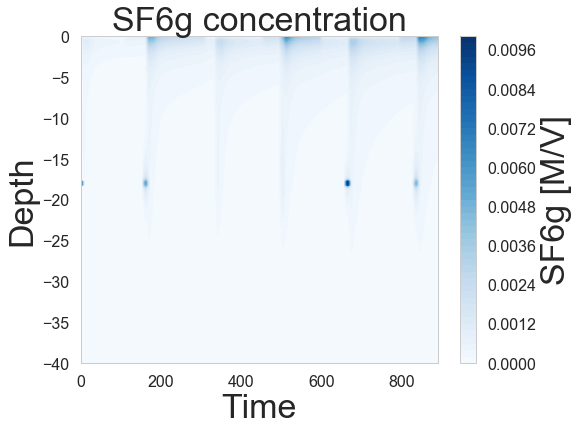

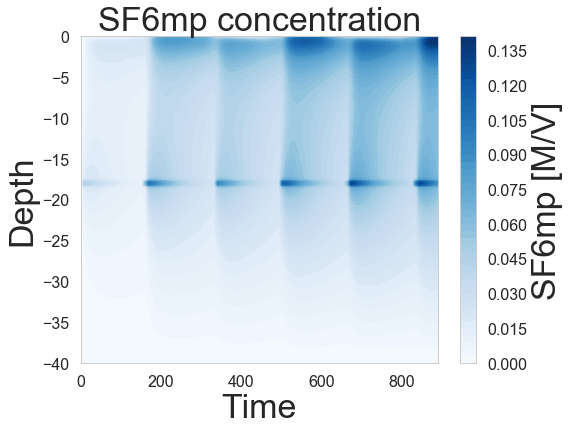

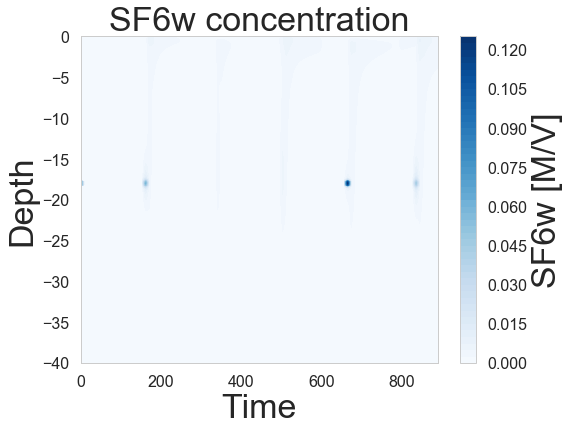

In [15]:
ftc1.plot_contourplots()

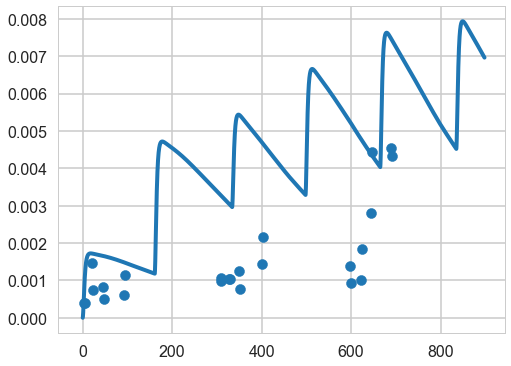

In [16]:
zm = 9
measured = (ftc1.SF6w.concentration[ftc1.x == zm, :][0] * phi_w[ftc1.x == zm] + ftc1.SF6g.concentration[ftc1.x == zm, :][0] * phi_g[ftc1.x == zm] +  ftc1.SF6mp.concentration[ftc1.x == zm, :][0] * phi_p[ftc1.x == zm]) / (phi_w[ftc1.x == zm] + phi_g[ftc1.x == zm] + phi_p[ftc1.x == zm])
plt.plot(ftc1.time, measured, label =zm)
plt.scatter(Tm, C1D9)


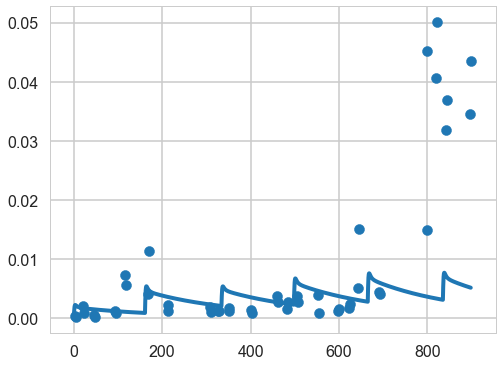

In [17]:
zm = 21
measured = (ftc1.SF6w.concentration[ftc1.x == zm, :][0] * phi_w[ftc1.x == zm] + ftc1.SF6g.concentration[ftc1.x == zm, :][0] * phi_g[ftc1.x == zm] +  ftc1.SF6mp.concentration[ftc1.x == zm, :][0] * phi_p[ftc1.x == zm]) / (phi_w[ftc1.x == zm] + phi_g[ftc1.x == zm] + phi_p[ftc1.x == zm])
plt.plot(ftc1.time, measured, label =zm)
plt.scatter(Tm, C1D21)

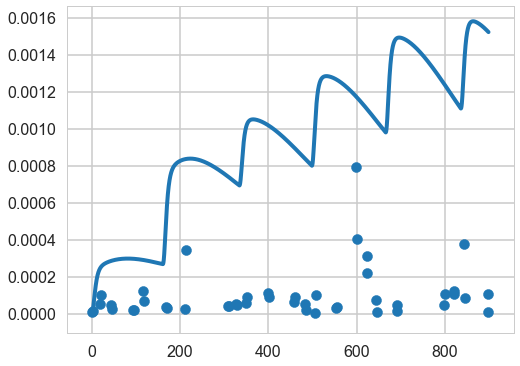

In [18]:
zm = 33
measured = (ftc1.SF6w.concentration[ftc1.x == zm, :][0] * phi_w[ftc1.x == zm] + ftc1.SF6g.concentration[ftc1.x == zm, :][0] * phi_g[ftc1.x == zm] +  ftc1.SF6mp.concentration[ftc1.x == zm, :][0] * phi_p[ftc1.x == zm]) / (phi_w[ftc1.x == zm] + phi_g[ftc1.x == zm] + phi_p[ftc1.x == zm])
plt.plot(ftc1.time, measured, label =zm)
plt.scatter(Tm, C1D33)

In [19]:
time_idxs = find_indexes_of_intersections(ftc1.time, Tm)

In [20]:
# %load_ext autoreload
# %autoreload 2

from porousmedialab.metrics import rmse

rmse(ftc1.SF6w.concentration[ftc1.x == 33, time_idxs], C1D33) + rmse(ftc1.SF6w.concentration[ftc1.x == 21, time_idxs], C1D21) + rmse(ftc1.SF6w.concentration[ftc1.x == 9, time_idxs], C1D9) 

0.017206038820294062

In [21]:
zm = 9
M1D9 = (
    ftc1.SF6w.concentration[ftc1.x == zm, time_idxs] * phi_w[ftc1.x == zm] +
    ftc1.SF6g.concentration[ftc1.x == zm, time_idxs] * phi_g[ftc1.x == zm] +
    ftc1.SF6mp.concentration[ftc1.x == zm, time_idxs] * phi_p[ftc1.x == zm]) / (
        phi_w[ftc1.x == zm] + phi_g[ftc1.x == zm] + phi_p[ftc1.x == zm])

zm = 21
M1D21 = (
    ftc1.SF6w.concentration[ftc1.x == zm, time_idxs] * phi_w[ftc1.x == zm] +
    ftc1.SF6g.concentration[ftc1.x == zm, time_idxs] * phi_g[ftc1.x == zm] +
    ftc1.SF6mp.concentration[ftc1.x == zm, time_idxs] * phi_p[ftc1.x == zm]) / (
        phi_w[ftc1.x == zm] + phi_g[ftc1.x == zm] + phi_p[ftc1.x == zm])

zm = 33
M1D33 = (
    ftc1.SF6w.concentration[ftc1.x == zm, time_idxs] * phi_w[ftc1.x == zm] +
    ftc1.SF6g.concentration[ftc1.x == zm, time_idxs] * phi_g[ftc1.x == zm] +
    ftc1.SF6mp.concentration[ftc1.x == zm, time_idxs] * phi_p[ftc1.x == zm]) / (
        phi_w[ftc1.x == zm] + phi_g[ftc1.x == zm] + phi_p[ftc1.x == zm])

In [22]:
rmse(M1D9, C1D9) + rmse(M1D21, C1D21) + rmse(M1D33, C1D33)

0.017906321864212774

In [ ]:
%run danny_optimization.py

/Users/imarkelo/git/PorousMediaLab/examples/temporary testing folder/danny_optimization.py:33: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  x = np.linspace(0, L, L / dx + 1)
/Users/imarkelo/git/PorousMediaLab/examples/temporary testing folder/danny_optimization.py:34: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  t = np.linspace(0, tend, round(tend / dt) + 1)


-0.02 0.06 0.02 0.9 90.0
0.0180615111782
-0.021 0.06 0.02 0.9 90.0
0.0180689533597
-0.02 0.063 0.02 0.9 90.0
